# KNN Regression and Classification

## 1. K Nearest Neighbor Classification

In [1]:
import numpy as np    # For array operations
import pandas as pd   # For DataFrames

* MNIST database (Modified National Institute of Standards and Technology database)
* Digits written by high school students and employees of the United States Census Bureau
* The MNIST database contains 60,000 training images and 10,000 testing images
* A sample of 5,000 training images and 1,000 testing images are taken

    <img src="data/mnist.png">

In [2]:
train = pd.read_csv('./data/MNIST/train_sample.csv')
test = pd.read_csv('./data/MNIST/test_sample.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

print(X_train.shape)
print(y_train.shape)

(5000, 784)
(5000,)


In [5]:
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

print(X_test.shape)
print(y_test.shape)

(1000, 784)
(1000,)


## Plot the data

In [6]:
s = np.random.choice(range(X_train.shape[0]), size=12)
list(enumerate(s))

[(0, 350),
 (1, 86),
 (2, 1228),
 (3, 4382),
 (4, 180),
 (5, 3850),
 (6, 4420),
 (7, 4448),
 (8, 13),
 (9, 1499),
 (10, 4121),
 (11, 1588)]

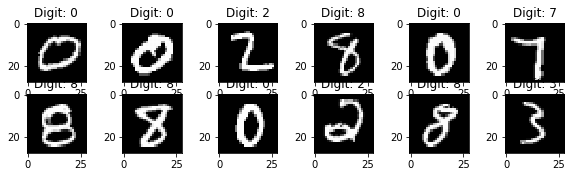

In [7]:
import matplotlib.pyplot as plt    # For plotting 
%matplotlib inline                 

plt.figure(figsize=(10,5)) #Width and heigth of the image displayed below (Optional)

for i,j in enumerate(s):
    plt.subplot(4,6,i+1)                                      # Subplot flag
    plt.imshow(np.array(X_train.loc[j]).reshape(28,28))      # Plot the image
    plt.title('Digit: '+str(y_train.loc[j]))                 # Target of the image
    plt.gray()                                                # For gray scale images 

## Classification

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='brute',
                           n_neighbors=5,
                           p=2,
                           weights='distance')
#brute for searching through all samples
#p=2 for euclidean; p=1 for manhatten distance
#check the help file
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

## Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix

pred_train = knn.predict(X_train) 

# write the code
cm_test = confusion_matrix(y_true=y_train,y_pred=pred_train)
print(cm_test)


[[500   0   0   0   0   0   0   0   0   0]
 [  0 500   0   0   0   0   0   0   0   0]
 [  0   0 500   0   0   0   0   0   0   0]
 [  0   0   0 500   0   0   0   0   0   0]
 [  0   0   0   0 500   0   0   0   0   0]
 [  0   0   0   0   0 500   0   0   0   0]
 [  0   0   0   0   0   0 500   0   0   0]
 [  0   0   0   0   0   0   0 500   0   0]
 [  0   0   0   0   0   0   0   0 500   0]
 [  0   0   0   0   0   0   0   0   0 500]]


In [15]:
# pd.crosstab(y_train, pred_train, rownames=['True'], colnames=['Predicted'])

In [17]:
pred_test = knn.predict(X_test) 

# write the code
cm_test = confusion_matrix(y_true=y_test,y_pred=pred_test)
print(cm_test)


[[ 97   0   0   0   0   0   3   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  0   3  95   0   0   0   0   1   0   1]
 [  1   0   1  88   0   5   0   1   2   2]
 [  0   2   0   0  92   0   0   0   0   6]
 [  0   1   0   3   0  94   2   0   0   0]
 [  0   0   0   0   0   3  97   0   0   0]
 [  0   3   0   0   0   0   0  95   0   2]
 [  0   1   1   2   0   6   0   1  88   1]
 [  0   0   0   0   0   0   0   3   0  97]]


In [12]:
# pd.crosstab(y_test, pred_test, rownames=['True'], colnames=['Predicted'])

### Accuracy

In [21]:
# write the code
acc_test = float(np.trace(cm_test))/np.sum(cm_test)
print(acc_test)


0.943


In [1]:

from imblearn import *


C:\Users\AllBlue\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\AllBlue\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\AllBlue\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be remo

---
## 2. KNN Regression

In [2]:
## Randomly Generate some Data
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [3]:
data = pd.read_csv('data/AirQualityUCI.csv', sep =';')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [6]:
#Dropping records with all missing values
data.dropna(axis=0, how='all', inplace=True)

#Dropping columns with >90% missing Values
data.dropna(how='any', axis=1, inplace=True)

#Dropping unnecessary columns
data.drop(['Date','Time'], axis=1, inplace=True)

#prinitng the data
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [1]:
# write the code for data preprocessing


In [7]:
data.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [8]:
# write the code
col_names=data.columns
col_names

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [9]:
data.dtypes

CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

In [16]:
# Creating a Function for replacing ',' with '.'
def replace_functionality(x):
    print(x)
    x1 = x.replace(',','.')
    print(x1)
    x2 = float(x1)
    return(x2)


# Applying the functionality for specific columns
cols_to_convert = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
for i in cols_to_convert:
    data[i] = data[i].apply(lambda x: replace_functionality(x))


2,6
2.6
2
2
2,2
2.2
2,2
2.2
1,6
1.6
1,2
1.2
1,2
1.2
1
1
0,9
0.9
0,6
0.6
-200
-200
0,7
0.7
0,7
0.7
1,1
1.1
2
2
2,2
2.2
1,7
1.7
1,5
1.5
1,6
1.6
1,9
1.9
2,9
2.9
2,2
2.2
2,2
2.2
2,9
2.9
4,8
4.8
6,9
6.9
6,1
6.1
3,9
3.9
1,5
1.5
1
1
1,7
1.7
1,9
1.9
1,4
1.4
0,8
0.8
-200
-200
0,6
0.6
0,8
0.8
1,4
1.4
4,4
4.4
-200
-200
3,1
3.1
2,7
2.7
2,1
2.1
2,5
2.5
2,7
2.7
2,9
2.9
2,8
2.8
2,4
2.4
3,9
3.9
3,7
3.7
6,6
6.6
4,4
4.4
3,5
3.5
5,4
5.4
2,7
2.7
1,9
1.9
1,6
1.6
1,7
1.7
-200
-200
1
1
1,2
1.2
1,5
1.5
2,7
2.7
3,7
3.7
3,2
3.2
4,1
4.1
3,6
3.6
2,8
2.8
2
2
2
2
2,5
2.5
2,3
2.3
3,2
3.2
4,2
4.2
4,2
4.2
4,2
4.2
3,1
3.1
2,6
2.6
2,9
2.9
2,8
2.8
2,5
2.5
2,4
2.4
-200
-200
1,2
1.2
1
1
0,9
0.9
1,4
1.4
1,6
1.6
2,2
2.2
2,8
2.8
2,8
2.8
2
2
1,8
1.8
1,9
1.9
3
3
2,9
2.9
2,5
2.5
4,6
4.6
5,9
5.9
3,4
3.4
2,1
2.1
2,2
2.2
1,8
1.8
1,8
1.8
1,8
1.8
1,1
1.1
-200
-200
1
1
1,4
1.4
2,2
2.2
5,5
5.5
8,1
8.1
5,8
5.8
4,2
4.2
3,1
3.1
2,9
2.9
2,9
2.9
2,5
2.5
2,3
2.3
2,8
2.8
6,1
6.1
8
8
6,5
6.5
4,2
4.2
3,2
3.2
1,4
1.4
2,1
2.1
1,2
1.2
0,8
0.8
0,7


2
2
1,7
1.7
2
2
1,5
1.5
0,8
0.8
0,5
0.5
0,3
0.3
-200
-200
0,3
0.3
0,9
0.9
2,8
2.8
5,4
5.4
4
4
2,2
2.2
2,2
2.2
2
2
2
2
1,9
1.9
2,7
2.7
2,2
2.2
3,5
3.5
4,1
4.1
4,4
4.4
4,5
4.5
2,9
2.9
2,6
2.6
2,1
2.1
1,2
1.2
0,6
0.6
0,3
0.3
0,3
0.3
-200
-200
0,3
0.3
0,7
0.7
4,2
4.2
4,8
4.8
3,4
3.4
2,8
2.8
1,8
1.8
1,9
1.9
2
2
1,9
1.9
2
2
2,3
2.3
2,7
2.7
3,6
3.6
3,8
3.8
3,5
3.5
2,5
2.5
2,5
2.5
3
3
3,7
3.7
3,3
3.3
1,5
1.5
0,7
0.7
-200
-200
0,5
0.5
0,5
0.5
1,2
1.2
2,2
2.2
2,2
2.2
2,1
2.1
1,8
1.8
2,2
2.2
2
2
1,4
1.4
1,8
1.8
2,1
2.1
2,8
2.8
2,8
2.8
2,7
2.7
1,8
1.8
1,2
1.2
2,6
2.6
3,1
3.1
4,1
4.1
3,6
3.6
1,9
1.9
1,9
1.9
-200
-200
0,3
0.3
0,4
0.4
0,8
0.8
0,8
0.8
0,8
0.8
0,8
0.8
0,9
0.9
1,2
1.2
1
1
0,8
0.8
1,1
1.1
1,5
1.5
1,5
1.5
1,4
1.4
1,1
1.1
0,9
0.9
1
1
1,1
1.1
1
1
0,7
0.7
0,5
0.5
0,2
0.2
-200
-200
-200
-200
0,1
0.1
0,5
0.5
1,6
1.6
2
2
1,3
1.3
1
1
0,9
0.9
1,2
1.2
1,3
1.3
1,1
1.1
1,2
1.2
1,4
1.4
2
2
2,4
2.4
2,1
2.1
1,2
1.2
0,7
0.7
0,7
0.7
0,8
0.8
0,5
0.5
0,2
0.2
-200
-200
-200
-200
-200
-200
0,1
0.1
0,2
0.2
1,

1.3
1,6
1.6
1,8
1.8
2,2
2.2
1,8
1.8
2,3
2.3
2
2
1,8
1.8
0,9
0.9
0,5
0.5
0,6
0.6
0,4
0.4
0,4
0.4
0,4
0.4
0,8
0.8
0,8
0.8
0,9
0.9
0,7
0.7
0,6
0.6
0,5
0.5
0,6
0.6
0,7
0.7
0,9
0.9
0,9
0.9
1,2
1.2
1,4
1.4
1,5
1.5
1,7
1.7
1,7
1.7
1,7
1.7
1,9
1.9
1,2
1.2
0,7
0.7
0,3
0.3
0,2
0.2
0,4
0.4
0,8
0.8
1,9
1.9
-200
-200
1,9
1.9
1,9
1.9
1,9
1.9
1,7
1.7
1,4
1.4
1,2
1.2
1,4
1.4
1,4
1.4
1,9
1.9
2,2
2.2
1,9
1.9
1,7
1.7
1,2
1.2
0,3
0.3
0,1
0.1
0,1
0.1
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-

-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
4,7
4.7
8
8
7,7
7.7
6,8
6.8
6
6
4,7
4.7
3,4
3.4
3,9
3.9
4,4
4.4
3,3
3.3
2
2
1,5
1.5
-200
-200
0,8
0.8
1,3
1.3
2,7
2.7
3,6
3.6
3,6
3.6
2,6
2.6
2
2
3,3
3.3
2,6
2.6
2,1
2.1
2,9
2.9
3
3
3,2
3.2
4,4
4.4
6
6
5
5
4,3
4.3
4,3
4.3
4,2
4.2


3.3
3,3
3.3
2,6
2.6
1,7
1.7
1,8
1.8
1,5
1.5
1,1
1.1
0,9
0.9
0,7
0.7
0,7
0.7
0,9
0.9
1,3
1.3
3,2
3.2
5,1
5.1
3,7
3.7
3,2
3.2
3,1
3.1
3,0
3.0
3,6
3.6
3,2
3.2
3,9
3.9
3,4
3.4
3,9
3.9
3,6
3.6
4,7
4.7
4,1
4.1
3,4
3.4
3,5
3.5
1,2
1.2
2,4
2.4
2,1
2.1
1,1
1.1
-200
-200
1,0
1.0
1,4
1.4
1,8
1.8
3,8
3.8
4,1
4.1
4,4
4.4
3,5
3.5
3,5
3.5
3,8
3.8
3,1
3.1
3,4
3.4
3,3
3.3
3,4
3.4
4,7
4.7
5,7
5.7
5,6
5.6
5,9
5.9
3,6
3.6
2,5
2.5
2,9
2.9
2,5
2.5
1,7
1.7
1,6
1.6
1,1
1.1
0,9
0.9
1,0
1.0
1,6
1.6
3,1
3.1
4,1
4.1
3,9
3.9
3,6
3.6
3,2
3.2
2,2
2.2
2,4
2.4
2,7
2.7
2,7
2.7
3,9
3.9
5,2
5.2
4,0
4.0
2,9
2.9
3,3
3.3
2,0
2.0
1,8
1.8
2,7
2.7
1,8
1.8
1,3
1.3
1,0
1.0
1,1
1.1
1,6
1.6
1,3
1.3
1,4
1.4
5,0
5.0
4,3
4.3
4,1
4.1
3,8
3.8
3,1
3.1
3,3
3.3
3,1
3.1
2,7
2.7
3,4
3.4
5,0
5.0
5,7
5.7
5,8
5.8
5,8
5.8
5,0
5.0
1,7
1.7
1,6
1.6
2,3
2.3
2,4
2.4
2,0
2.0
1,6
1.6
-200
-200
1,1
1.1
1,0
1.0
1,3
1.3
1,9
1.9
2,6
2.6
2,7
2.7
2,4
2.4
2,7
2.7
3,1
3.1
4,4
4.4
3,2
3.2
2,9
2.9
3,0
3.0
3,7
3.7
5,2
5.2
3,3
3.3
3,6
3.6
2,3
2.3
3,0
3.0
3,8
3.8


1.2
1,0
1.0
1,0
1.0
0,8
0.8
0,6
0.6
0,6
0.6
1,0
1.0
1,0
1.0
1,3
1.3
1,5
1.5
1,6
1.6
1,4
1.4
1,4
1.4
1,2
1.2
1,3
1.3
1,4
1.4
1,6
1.6
2,8
2.8
3,7
3.7
2,9
2.9
1,8
1.8
1,6
1.6
1,7
1.7
1,5
1.5
1,0
1.0
0,8
0.8
0,5
0.5
-200,0
-200.0
0,5
0.5
1,0
1.0
3,0
3.0
5,1
5.1
4,3
4.3
3,3
3.3
2,4
2.4
2,4
2.4
2,5
2.5
2,3
2.3
2,7
2.7
2,7
2.7
3,3
3.3
3,9
3.9
2,6
2.6
3,2
3.2
2,3
2.3
1,4
1.4
1,1
1.1
1,2
1.2
0,9
0.9
0,7
0.7
0,5
0.5
0,4
0.4
0,5
0.5
0,8
0.8
2,3
2.3
2,9
2.9
3,1
3.1
2,7
2.7
1,8
1.8
1,9
1.9
1,8
1.8
1,8
1.8
1,8
1.8
1,7
1.7
3,2
3.2
3,4
3.4
4,2
4.2
3,5
3.5
2,0
2.0
1,4
1.4
1,5
1.5
1,2
1.2
1,1
1.1
0,7
0.7
0,6
0.6
0,5
0.5
0,6
0.6
0,9
0.9
4,0
4.0
4,1
4.1
1,9
1.9
1,3
1.3
1,2
1.2
1,2
1.2
1,2
1.2
0,9
0.9
1,0
1.0
1,1
1.1
1,5
1.5
2,1
2.1
2,1
2.1
1,5
1.5
1,0
1.0
0,8
0.8
0,8
0.8
0,7
0.7
0,6
0.6
0,5
0.5
0,5
0.5
-200,0
-200.0
0,5
0.5
0,6
0.6
1,5
1.5
1,9
1.9
1,3
1.3
1,0
1.0
1,0
1.0
1,1
1.1
1,3
1.3
1,0
1.0
1,1
1.1
1,4
1.4
1,5
1.5
1,6
1.6
2,2
2.2
1,4
1.4
0,9
0.9
0,8
0.8
1,1
1.1
1,5
1.5
1,1
1.1
0,6
0.6
0,5
0.5
0,4
0.4


5,7
5.7
6,5
6.5
4,7
4.7
2,5
2.5
1,4
1.4
1,0
1.0
1,7
1.7
4,5
4.5
9,4
9.4
17,9
17.9
10,6
10.6
11,0
11.0
7,2
7.2
8,7
8.7
11,1
11.1
7,9
7.9
9,8
9.8
16,4
16.4
22,6
22.6
20,2
20.2
21,7
21.7
21,2
21.2
15,9
15.9
12,0
12.0
17,4
17.4
15,0
15.0
11,1
11.1
6,9
6.9
5,1
5.1
6,1
6.1
6,5
6.5
8,4
8.4
22,8
22.8
29,1
29.1
13,6
13.6
11,1
11.1
10,0
10.0
10,5
10.5
13,0
13.0
12,5
12.5
11,4
11.4
13,1
13.1
14,9
14.9
19,1
19.1
21,8
21.8
16,1
16.1
11,6
11.6
12,4
12.4
10,4
10.4
9,7
9.7
5,7
5.7
5,4
5.4
5,6
5.6
4,4
4.4
2,8
2.8
3,9
3.9
9,1
9.1
13,6
13.6
15,8
15.8
12,7
12.7
8,6
8.6
9,4
9.4
9,2
9.2
6,4
6.4
8,3
8.3
8,1
8.1
8,5
8.5
11,0
11.0
12,1
12.1
15,0
15.0
10,2
10.2
9,9
9.9
12,0
12.0
10,5
10.5
7,1
7.1
4,6
4.6
4,2
4.2
2,6
2.6
2,2
2.2
2,0
2.0
4,2
4.2
5,2
5.2
8,2
8.2
9,8
9.8
7,9
7.9
7,7
7.7
4,8
4.8
5,3
5.3
7,1
7.1
9,2
9.2
10,1
10.1
9,9
9.9
15,1
15.1
10,6
10.6
7,0
7.0
5,9
5.9
5,6
5.6
5,4
5.4
3,7
3.7
1,8
1.8
1,4
1.4
1,4
1.4
3,5
3.5
7,0
7.0
14,4
14.4
8,9
8.9
8,6
8.6
8,5
8.5
8,3
8.3
10,1
10.1
9,1
9.1
8,5
8.5
7,7
7.7
9,0
9.

2,7
2.7
6,9
6.9
9,2
9.2
9,6
9.6
9,1
9.1
9,3
9.3
8,5
8.5
6,9
6.9
6,9
6.9
6,4
6.4
6,2
6.2
7,3
7.3
10,7
10.7
11,9
11.9
10,6
10.6
9,3
9.3
6,7
6.7
7,2
7.2
5,9
5.9
8,7
8.7
6,8
6.8
3,8
3.8
2,2
2.2
3,2
3.2
3,9
3.9
6,3
6.3
13,6
13.6
26,7
26.7
22,8
22.8
16,2
16.2
10,4
10.4
11,3
11.3
9,6
9.6
7,8
7.8
10,7
10.7
10,8
10.8
17,3
17.3
17,7
17.7
15,5
15.5
13,6
13.6
9,6
9.6
9,5
9.5
8,5
8.5
9,0
9.0
7,8
7.8
2,6
2.6
2,4
2.4
1,9
1.9
3,7
3.7
7,1
7.1
16,6
16.6
26,6
26.6
17,9
17.9
17,9
17.9
14,0
14.0
10,1
10.1
9,5
9.5
7,1
7.1
12,3
12.3
11,7
11.7
12,8
12.8
14,0
14.0
13,9
13.9
11,7
11.7
13,8
13.8
14,8
14.8
11,9
11.9
11,1
11.1
8,0
8.0
5,6
5.6
7,1
7.1
3,5
3.5
4,1
4.1
4,9
4.9
19,4
19.4
26,3
26.3
22,0
22.0
18,1
18.1
12,1
12.1
9,4
9.4
10,1
10.1
10,5
10.5
10,8
10.8
9,6
9.6
13,0
13.0
15,5
15.5
16,5
16.5
14,5
14.5
13,2
13.2
14,8
14.8
10,7
10.7
-200,0
-200.0
6,4
6.4
5,5
5.5
5,2
5.2
3,9
3.9
4,7
4.7
7,3
7.3
6,4
6.4
9,2
9.2
12,5
12.5
15,7
15.7
15,9
15.9
14,6
14.6
11,7
11.7
7,4
7.4
6,1
6.1
6,9
6.9
6,2
6.2
8,1
8.1
10,2
10.2
10

3,1
3.1
2,3
2.3
3,1
3.1
4,0
4.0
10,8
10.8
13,0
13.0
10,3
10.3
16,3
16.3
12,7
12.7
9,7
9.7
9,1
9.1
7,0
7.0
7,0
7.0
9,5
9.5
9,8
9.8
11,7
11.7
13,9
13.9
8,7
8.7
10,9
10.9
12,3
12.3
12,4
12.4
12,1
12.1
8,0
8.0
8,4
8.4
4,9
4.9
4,2
4.2
2,3
2.3
2,5
2.5
4,9
4.9
6,6
6.6
6,5
6.5
6,4
6.4
5,6
5.6
6,4
6.4
7,6
7.6
3,5
3.5
3,3
3.3
6,6
6.6
8,3
8.3
8,0
8.0
12,6
12.6
17,5
17.5
14,8
14.8
23,3
23.3
12,2
12.2
7,2
7.2
4,6
4.6
3,8
3.8
3,7
3.7
4,0
4.0
5,5
5.5
8,3
8.3
28,2
28.2
32,1
32.1
17,7
17.7
18,4
18.4
16,3
16.3
18,2
18.2
17,9
17.9
12,6
12.6
11,3
11.3
14,9
14.9
18,5
18.5
25,2
25.2
35,9
35.9
26,7
26.7
19,9
19.9
14,6
14.6
6,9
6.9
5,6
5.6
3,9
3.9
3,2
3.2
3,9
3.9
4,6
4.6
5,0
5.0
9,6
9.6
27,8
27.8
32,1
32.1
20,9
20.9
11,8
11.8
15,8
15.8
15,8
15.8
14,0
14.0
8,2
8.2
13,7
13.7
19,5
19.5
26,7
26.7
18,7
18.7
13,9
13.9
6,7
6.7
4,2
4.2
3,6
3.6
4,4
4.4
4,2
4.2
2,6
2.6
3,1
3.1
3,0
3.0
3,4
3.4
4,0
4.0
7,8
7.8
16,1
16.1
27,6
27.6
17,8
17.8
18,5
18.5
21,6
21.6
21,0
21.0
17,2
17.2
16,1
16.1
18,6
18.6
17,2
17.2
17,3
17.3
28

4.8
5,4
5.4
4,3
4.3
2,9
2.9
2,5
2.5
2,2
2.2
2,7
2.7
6,1
6.1
7,7
7.7
15,9
15.9
22,8
22.8
16,6
16.6
8,4
8.4
13,9
13.9
24,9
24.9
22,4
22.4
26,1
26.1
18,1
18.1
13,9
13.9
18,5
18.5
20,9
20.9
12,9
12.9
6,7
6.7
7,0
7.0
7,3
7.3
9,1
9.1
9,9
9.9
6,9
6.9
6,5
6.5
5,9
5.9
5,4
5.4
5,4
5.4
7,8
7.8
13,6
13.6
15,4
15.4
14,4
14.4
14,3
14.3
20,3
20.3
18,7
18.7
17,3
17.3
16,9
16.9
16,4
16.4
19,1
19.1
18,7
18.7
22,4
22.4
25,3
25.3
17,7
17.7
13,8
13.8
10,2
10.2
8,6
8.6
7,9
7.9
5,7
5.7
6,4
6.4
4,6
4.6
2,7
2.7
2,1
2.1
1,2
1.2
1,4
1.4
4,6
4.6
5,7
5.7
10,6
10.6
11,0
11.0
8,6
8.6
8,8
8.8
7,5
7.5
11,6
11.6
10,1
10.1
10,8
10.8
30,3
30.3
22,4
22.4
20,6
20.6
17,5
17.5
13,9
13.9
13,6
13.6
15,9
15.9
17,8
17.8
16,7
16.7
16,0
16.0
16,9
16.9
15,0
15.0
9,6
9.6
7,8
7.8
8,7
8.7
9,8
9.8
12,4
12.4
13,9
13.9
12,5
12.5
10,9
10.9
6,5
6.5
9,4
9.4
15,3
15.3
16,4
16.4
19,8
19.8
15,8
15.8
14,5
14.5
14,7
14.7
15,3
15.3
13,0
13.0
10,5
10.5
7,6
7.6
4,8
4.8
3,1
3.1
2,6
2.6
2,7
2.7
3,0
3.0
8,7
8.7
20,7
20.7
25,2
25.2
23,6
23.6
32,9
32.9


12.5
8,8
8.8
9,0
9.0
6,1
6.1
7,8
7.8
11,5
11.5
10,7
10.7
9,2
9.2
10,9
10.9
11,6
11.6
9,0
9.0
11,6
11.6
11,7
11.7
11,3
11.3
10,4
10.4
6,4
6.4
9,8
9.8
5,8
5.8
7,0
7.0
4,0
4.0
6,9
6.9
7,7
7.7
9,9
9.9
8,9
8.9
11,3
11.3
13,7
13.7
12,7
12.7
14,5
14.5
18,4
18.4
22,0
22.0
25,4
25.4
16,4
16.4
12,4
12.4
9,6
9.6
7,1
7.1
7,2
7.2
9,3
9.3
5,9
5.9
5,9
5.9
2,4
2.4
2,1
2.1
1,8
1.8
3,1
3.1
6,8
6.8
16,4
16.4
16,7
16.7
17,3
17.3
22,4
22.4
17,9
17.9
22,4
22.4
23,3
23.3
28,0
28.0
30,1
30.1
33,4
33.4
50,8
50.8
35,6
35.6
21,5
21.5
15,5
15.5
10,9
10.9
8,7
8.7
7,4
7.4
9,9
9.9
8,2
8.2
3,9
3.9
3,2
3.2
3,0
3.0
5,4
5.4
8,7
8.7
15,4
15.4
27,2
27.2
30,7
30.7
24,3
24.3
21,7
21.7
25,8
25.8
21,8
21.8
20,6
20.6
27,2
27.2
-200,0
-200.0
-200,0
-200.0
-200,0
-200.0
-200,0
-200.0
-200,0
-200.0
-200,0
-200.0
-200,0
-200.0
-200,0
-200.0
-200,0
-200.0
-200,0
-200.0
-200,0
-200.0
-200,0
-200.0
-200,0
-200.0
-200,0
-200.0
-200,0
-200.0
-200,0
-200.0
-200,0
-200.0
-200,0
-200.0
-200,0
-200.0
-200,0
-200.0
-200,0
-200.0
-200,0
-200

2,4
2.4
3,9
3.9
4,1
4.1
2,5
2.5
1,3
1.3
1,2
1.2
0,7
0.7
0,9
0.9
2,9
2.9
2,7
2.7
14,4
14.4
17,2
17.2
17,4
17.4
11,5
11.5
11,9
11.9
12,6
12.6
14,3
14.3
10,3
10.3
14,5
14.5
21,9
21.9
28,5
28.5
21,2
21.2
16,0
16.0
13,0
13.0
7,0
7.0
6,4
6.4
5,8
5.8
5,6
5.6
4,5
4.5
4,6
4.6
5,9
5.9
6,6
6.6
9,2
9.2
12,2
12.2
22,6
22.6
29,0
29.0
19,4
19.4
20,5
20.5
22,5
22.5
24,0
24.0
13,9
13.9
16,8
16.8
20,2
20.2
16,4
16.4
18,0
18.0
20,3
20.3
38,1
38.1
35,7
35.7
21,8
21.8
18,2
18.2
20,1
20.1
14,4
14.4
15,1
15.1
13,1
13.1
11,5
11.5
13,7
13.7
11,6
11.6
13,2
13.2
15,6
15.6
16,9
16.9
18,5
18.5
16,6
16.6
15,0
15.0
15,0
15.0
16,9
16.9
7,0
7.0
5,9
5.9
7,1
7.1
8,6
8.6
12,2
12.2
12,6
12.6
21,1
21.1
16,9
16.9
15,1
15.1
10,1
10.1
7,5
7.5
7,6
7.6
5,9
5.9
5,5
5.5
2,3
2.3
2,0
2.0
1,6
1.6
2,1
2.1
4,4
4.4
6,4
6.4
7,3
7.3
8,7
8.7
9,2
9.2
7,9
7.9
9,0
9.0
7,0
7.0
3,7
3.7
4,3
4.3
6,8
6.8
8,7
8.7
4,7
4.7
3,5
3.5
5,4
5.4
4,4
4.4
6,0
6.0
7,6
7.6
1,9
1.9
1,0
1.0
0,6
0.6
1,2
1.2
2,9
2.9
11,1
11.1
9,7
9.7
5,7
5.7
5,4
5.4
5,1
5.1
5,8
5.

11.1
6,2
6.2
5,0
5.0
5,3
5.3
4,2
4.2
3,5
3.5
3,0
3.0
4,1
4.1
4,0
4.0
5,1
5.1
6,7
6.7
15,6
15.6
17,1
17.1
8,8
8.8
6,9
6.9
5,4
5.4
4,9
4.9
5,3
5.3
5,4
5.4
5,5
5.5
7,5
7.5
16,7
16.7
18,2
18.2
15,5
15.5
10,9
10.9
8,7
8.7
7,3
7.3
7,5
7.5
6,8
6.8
4,7
4.7
2,5
2.5
1,3
1.3
2,2
2.2
3,6
3.6
7,5
7.5
16,8
16.8
28,0
28.0
15,8
15.8
15,5
15.5
14,9
14.9
16,4
16.4
15,6
15.6
16,1
16.1
16,6
16.6
15,9
15.9
13,3
13.3
14,9
14.9
18,5
18.5
7,9
7.9
5,0
5.0
6,5
6.5
6,0
6.0
6,8
6.8
4,0
4.0
4,4
4.4
4,0
4.0
3,5
3.5
4,3
4.3
2,0
2.0
6,1
6.1
8,7
8.7
3,1
3.1
5,2
5.2
5,3
5.3
6,7
6.7
8,3
8.3
5,9
5.9
7,3
7.3
8,4
8.4
7,7
7.7
9,1
9.1
10,9
10.9
10,2
10.2
7,8
7.8
7,0
7.0
9,2
9.2
4,6
4.6
2,1
2.1
1,5
1.5
1,3
1.3
0,8
0.8
0,6
0.6
1,1
1.1
1,0
1.0
1,5
1.5
1,4
1.4
2,0
2.0
2,3
2.3
2,6
2.6
6,7
6.7
13,3
13.3
4,0
4.0
5,3
5.3
8,6
8.6
6,2
6.2
5,3
5.3
4,1
4.1
3,5
3.5
4,1
4.1
3,2
3.2
3,2
3.2
1,7
1.7
0,7
0.7
0,5
0.5
0,6
0.6
0,8
0.8
1,7
1.7
5,2
5.2
6,6
6.6
5,5
5.5
4,4
4.4
4,4
4.4
4,3
4.3
4,5
4.5
4,5
4.5
4,8
4.8
6,3
6.3
9,6
9.6
15,0
15.0
15,4


18,0
18.0
17,0
17.0
16,1
16.1
14,5
14.5
13,2
13.2
13,1
13.1
13,5
13.5
12,4
12.4
13,1
13.1
11,6
11.6
10,5
10.5
11,7
11.7
12,2
12.2
12,9
12.9
11,3
11.3
11,9
11.9
13,3
13.3
16,3
16.3
17,9
17.9
18,3
18.3
20,8
20.8
22,4
22.4
20,9
20.9
19,1
19.1
18,1
18.1
17,3
17.3
15,8
15.8
15,9
15.9
15,9
15.9
15,0
15.0
15,1
15.1
14,9
14.9
14,8
14.8
14,8
14.8
14,8
14.8
14,2
14.2
14,5
14.5
14,6
14.6
14,4
14.4
13,8
13.8
13,2
13.2
10,4
10.4
11,5
11.5
12,2
12.2
12,3
12.3
11,3
11.3
13,6
13.6
14,9
14.9
15,7
15.7
15,2
15.2
15,5
15.5
14,3
14.3
13,2
13.2
12,6
12.6
12,3
12.3
12,0
12.0
12,0
12.0
11,5
11.5
10,7
10.7
9,0
9.0
10,2
10.2
11,0
11.0
9,6
9.6
9,5
9.5
11,9
11.9
16,2
16.2
19,2
19.2
19,7
19.7
20,6
20.6
21,8
21.8
-200
-200
-200
-200
-200
-200
23,6
23.6
22,8
22.8
20,8
20.8
18,3
18.3
16,8
16.8
15,8
15.8
14,9
14.9
14,1
14.1
13,3
13.3
13,3
13.3
11,8
11.8
11,2
11.2
11,3
11.3
11,4
11.4
11,9
11.9
12,6
12.6
13,6
13.6
16,9
16.9
19,4
19.4
22,9
22.9
23,6
23.6
24,7
24.7
26,1
26.1
27,6
27.6
26,9
26.9
24,3
24.3
21,2
21.2
19,4
1

18.1
17,3
17.3
16,9
16.9
17,6
17.6
15,6
15.6
14,9
14.9
15,6
15.6
14,0
14.0
14,5
14.5
15,5
15.5
17,0
17.0
18,8
18.8
19,7
19.7
20,9
20.9
21,9
21.9
20,4
20.4
17,4
17.4
17,1
17.1
17,3
17.3
17,7
17.7
17,4
17.4
17,6
17.6
16,7
16.7
16,8
16.8
16,1
16.1
15,5
15.5
16,2
16.2
16,4
16.4
16,2
16.2
16,0
16.0
16,2
16.2
16,2
16.2
15,9
15.9
16,2
16.2
16,0
16.0
16,6
16.6
17,4
17.4
17,6
17.6
17,2
17.2
18,2
18.2
19,5
19.5
19,5
19.5
19,8
19.8
20,3
20.3
20,3
20.3
19,8
19.8
19,1
19.1
18,2
18.2
17,8
17.8
17,5
17.5
17,3
17.3
16,8
16.8
16,3
16.3
16,2
16.2
15,5
15.5
16,0
16.0
17,2
17.2
18,5
18.5
20,0
20.0
21,0
21.0
22,8
22.8
25,5
25.5
25,9
25.9
27,7
27.7
27,1
27.1
28,4
28.4
28,1
28.1
27,6
27.6
25,2
25.2
24,6
24.6
23,1
23.1
22,0
22.0
20,8
20.8
20,4
20.4
19,1
19.1
18,0
18.0
17,4
17.4
14,8
14.8
14,6
14.6
15,7
15.7
15,3
15.3
16,0
16.0
17,6
17.6
20,3
20.3
23,1
23.1
25,0
25.0
25,6
25.6
25,5
25.5
26,1
26.1
28,2
28.2
27,4
27.4
26,0
26.0
23,8
23.8
23,0
23.0
21,7
21.7
20,9
20.9
20,2
20.2
19,6
19.6
18,1
18.1
17,0
17.0
16,7


35,1
35.1
36,9
36.9
39,3
39.3
40,3
40.3
39,7
39.7
41,1
41.1
40,1
40.1
37,4
37.4
34,0
34.0
31,7
31.7
29,7
29.7
27,9
27.9
26,8
26.8
25,8
25.8
26,3
26.3
24,3
24.3
24,7
24.7
23,3
23.3
21,1
21.1
20,2
20.2
21,3
21.3
22,6
22.6
25,7
25.7
31,6
31.6
36,3
36.3
37,9
37.9
39,4
39.4
40,2
40.2
41,3
41.3
41,4
41.4
40,1
40.1
37,6
37.6
33,9
33.9
31,6
31.6
29,7
29.7
29,0
29.0
27,9
27.9
28,0
28.0
26,8
26.8
26,6
26.6
23,7
23.7
22,2
22.2
21,2
21.2
21,4
21.4
22,9
22.9
25,2
25.2
27,1
27.1
32,4
32.4
36,8
36.8
39,1
39.1
39,2
39.2
40,5
40.5
41,4
41.4
40,5
40.5
39,6
39.6
37,7
37.7
34,3
34.3
31,7
31.7
30,2
30.2
29,4
29.4
29,2
29.2
27,6
27.6
27,2
27.2
25,4
25.4
25,2
25.2
23,4
23.4
25,1
25.1
23,9
23.9
24,8
24.8
27,0
27.0
29,4
29.4
34,8
34.8
38,1
38.1
38,9
38.9
39,8
39.8
41,7
41.7
42,8
42.8
41,4
41.4
41,3
41.3
38,3
38.3
34,7
34.7
32,6
32.6
30,9
30.9
30,1
30.1
29,0
29.0
28,3
28.3
27,6
27.6
25,8
25.8
27,4
27.4
26,3
26.3
23,3
23.3
23,1
23.1
24,2
24.2
25,8
25.8
28,1
28.1
33,9
33.9
38,0
38.0
38,9
38.9
40,4
40.4
40,1
40.1


26.5
25,7
25.7
24,7
24.7
23,6
23.6
23,4
23.4
21,6
21.6
21,2
21.2
20,6
20.6
22,1
22.1
21,1
21.1
21,8
21.8
21,7
21.7
25,3
25.3
30,3
30.3
32,9
32.9
34,4
34.4
34,3
34.3
33,4
33.4
36,1
36.1
37,3
37.3
36,8
36.8
34,9
34.9
30,8
30.8
28,9
28.9
27,0
27.0
26,6
26.6
26,0
26.0
24,1
24.1
22,2
22.2
22,8
22.8
21,2
21.2
21,7
21.7
20,2
20.2
20,1
20.1
20,6
20.6
22,4
22.4
25,0
25.0
29,9
29.9
32,9
32.9
35,0
35.0
34,6
34.6
33,8
33.8
36,3
36.3
38,3
38.3
36,9
36.9
33,9
33.9
29,8
29.8
27,5
27.5
27,5
27.5
28,1
28.1
26,9
26.9
26,0
26.0
24,9
24.9
23,7
23.7
24,5
24.5
22,9
22.9
23,3
23.3
23,6
23.6
24,9
24.9
26,4
26.4
28,1
28.1
30,2
30.2
31,2
31.2
33,9
33.9
33,9
33.9
34,4
34.4
35,3
35.3
36,3
36.3
35,3
35.3
32,5
32.5
29,1
29.1
27,8
27.8
27,0
27.0
26,3
26.3
25,2
25.2
24,3
24.3
23,3
23.3
24,1
24.1
23,8
23.8
23,0
23.0
23,7
23.7
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200


27,4
27.4
27,4
27.4
27,1
27.1
26,9
26.9
26,9
26.9
24,7
24.7
23,7
23.7
22,7
22.7
21,9
21.9
22,0
22.0
20,5
20.5
19,8
19.8
18,4
18.4
18,9
18.9
17,8
17.8
17,1
17.1
17,7
17.7
17,1
17.1
18,3
18.3
18,5
18.5
19,9
19.9
22,9
22.9
24,2
24.2
25,8
25.8
26,0
26.0
27,1
27.1
27,4
27.4
28,9
28.9
28,4
28.4
26,0
26.0
24,3
24.3
23,3
23.3
22,6
22.6
21,2
21.2
20,6
20.6
20,0
20.0
19,7
19.7
20,8
20.8
17,8
17.8
18,8
18.8
17,6
17.6
17,4
17.4
17,4
17.4
18,5
18.5
20,6
20.6
23,9
23.9
26,0
26.0
28,6
28.6
27,9
27.9
28,4
28.4
28,5
28.5
30,8
30.8
29,7
29.7
27,0
27.0
25,6
25.6
23,9
23.9
22,7
22.7
21,8
21.8
22,4
22.4
21,7
21.7
21,2
21.2
19,3
19.3
19,8
19.8
20,0
20.0
18,3
18.3
18,1
18.1
17,6
17.6
18,3
18.3
20,4
20.4
22,5
22.5
25,7
25.7
26,8
26.8
26,0
26.0
26,3
26.3
27,4
27.4
29,6
29.6
28,7
28.7
25,7
25.7
24,5
24.5
23,3
23.3
22,4
22.4
22,7
22.7
20,4
20.4
20,3
20.3
21,4
21.4
20,3
20.3
20,9
20.9
19,9
19.9
19,8
19.8
20,1
20.1
19,7
19.7
20,9
20.9
22,5
22.5
23,5
23.5
24,7
24.7
27,1
27.1
25,9
25.9
26,9
26.9
27,2
27.2
28,6
28.6


13.0
12,4
12.4
12,3
12.3
12,2
12.2
12,3
12.3
12,7
12.7
12,5
12.5
12,4
12.4
13,2
13.2
13,1
13.1
12,9
12.9
13,0
13.0
13,0
13.0
12,0
12.0
11,4
11.4
12,0
12.0
11,5
11.5
11,3
11.3
12,0
12.0
12,1
12.1
12,5
12.5
12,6
12.6
12,5
12.5
13,1
13.1
13,2
13.2
13,3
13.3
13,3
13.3
12,7
12.7
11,9
11.9
11,8
11.8
12,0
12.0
12,2
12.2
12,7
12.7
13,4
13.4
15,9
15.9
18,5
18.5
18,4
18.4
19,4
19.4
19,5
19.5
20,3
20.3
18,7
18.7
17,3
17.3
16,4
16.4
15,9
15.9
15,5
15.5
15,3
15.3
16,6
16.6
14,6
14.6
14,0
14.0
13,0
13.0
13,1
13.1
11,6
11.6
11,9
11.9
12,4
12.4
14,1
14.1
12,9
12.9
11,7
11.7
12,5
12.5
14,5
14.5
16,9
16.9
17,4
17.4
18,8
18.8
19,4
19.4
19,2
19.2
17,7
17.7
16,5
16.5
15,4
15.4
15,2
15.2
14,9
14.9
14,5
14.5
14,5
14.5
14,6
14.6
15,0
15.0
14,7
14.7
15,3
15.3
12,3
12.3
11,6
11.6
12,0
12.0
11,8
11.8
11,8
11.8
12,8
12.8
13,2
13.2
13,1
13.1
14,3
14.3
16,0
16.0
17,3
17.3
17,3
17.3
16,7
16.7
15,4
15.4
15,2
15.2
16,2
16.2
16,5
16.5
14,6
14.6
13,9
13.9
13,7
13.7
13,8
13.8
14,2
14.2
14,9
14.9
14,7
14.7
15,2
15.2
14,8


11.1
10,2
10.2
10,1
10.1
9,9
9.9
9,4
9.4
9,4
9.4
9,6
9.6
8,9
8.9
8,5
8.5
8,3
8.3
8,1
8.1
8,7
8.7
9,5
9.5
11,0
11.0
14,1
14.1
16,3
16.3
18,7
18.7
19,5
19.5
19,9
19.9
19,4
19.4
17,1
17.1
15,5
15.5
14,8
14.8
13,9
13.9
13,7
13.7
12,5
12.5
11,8
11.8
10,9
10.9
10,1
10.1
9,8
9.8
8,4
8.4
8,3
8.3
7,7
7.7
6,9
6.9
9,0
9.0
9,4
9.4
10,3
10.3
11,5
11.5
11,7
11.7
11,8
11.8
12,0
12.0
13,7
13.7
12,6
12.6
13,0
13.0
13,6
13.6
11,8
11.8
10,7
10.7
10,4
10.4
9,7
9.7
9,4
9.4
8,8
8.8
8,7
8.7
8,5
8.5
8,0
8.0
7,1
7.1
6,9
6.9
6,9
6.9
6,1
6.1
6,0
6.0
6,1
6.1
6,5
6.5
9,4
9.4
11,3
11.3
12,8
12.8
12,3
12.3
12,0
12.0
11,9
11.9
12,1
12.1
11,5
11.5
10,4
10.4
9,5
9.5
8,9
8.9
8,2
8.2
7,4
7.4
6,6
6.6
6,3
6.3
5,2
5.2
4,4
4.4
4,0
4.0
3,3
3.3
3,2
3.2
3,6
3.6
3,5
3.5
5,2
5.2
7,8
7.8
8,9
8.9
9,1
9.1
9,1
9.1
9,6
9.6
8,5
8.5
9,3
9.3
8,9
8.9
8,2
8.2
7,4
7.4
7,0
7.0
6,6
6.6
5,9
5.9
5,0
5.0
5,8
5.8
5,4
5.4
5,7
5.7
5,7
5.7
5,8
5.8
5,7
5.7
6,9
6.9
6,9
6.9
6,4
6.4
6,6
6.6
7,7
7.7
10,1
10.1
9,0
9.0
8,7
8.7
8,3
8.3
8,9
8.9
8,9
8.9
9,0
9

21,0
21.0
19,5
19.5
18,8
18.8
17,7
17.7
16,7
16.7
15,9
15.9
15,1
15.1
15,3
15.3
13,1
13.1
13,3
13.3
12,4
12.4
12,9
12.9
11,9
11.9
13,4
13.4
16,1
16.1
17,9
17.9
18,2
18.2
16,0
16.0
17,6
17.6
20,9
20.9
24,1
24.1
22,9
22.9
22,2
22.2
21,3
21.3
20,1
20.1
18,8
18.8
18,2
18.2
17,4
17.4
17,0
17.0
16,2
16.2
15,3
15.3
15,2
15.2
13,9
13.9
13,6
13.6
13,7
13.7
13,7
13.7
14,1
14.1
14,8
14.8
16,0
16.0
18,4
18.4
20,4
20.4
21,3
21.3
20,4
20.4
21,1
21.1
21,5
21.5
21,7
21.7
21,0
21.0
20,4
20.4
19,4
19.4
18,8
18.8
18,2
18.2
17,7
17.7
17,7
17.7
17,1
17.1
16,8
16.8
16,6
16.6
16,1
16.1
16,2
16.2
16,3
16.3
16,1
16.1
16,1
16.1
16,5
16.5
17,4
17.4
18,4
18.4
19,1
19.1
21,2
21.2
22,3
22.3
23,7
23.7
23,1
23.1
25,7
25.7
24,3
24.3
21,9
21.9
19,7
19.7
18,7
18.7
17,8
17.8
17,3
17.3
16,5
16.5
16,3
16.3
16,5
16.5
16,6
16.6
16,2
16.2
15,9
15.9
15,8
15.8
15,8
15.8
15,6
15.6
15,2
15.2
14,5
14.5
15,2
15.2
15,9
15.9
17,5
17.5
18,1
18.1
18,6
18.6
16,2
16.2
15,4
15.4
14,4
14.4
13,8
13.8
13,9
13.9
14,2
14.2
14,1
14.1
14,4
14.4


58.8
60,8
60.8
64,4
64.4
63,3
63.3
61,5
61.5
56,9
56.9
54,0
54.0
63,9
63.9
65,3
65.3
62,5
62.5
58,8
58.8
56,7
56.7
57,4
57.4
55,2
55.2
54,3
54.3
51,5
51.5
47,5
47.5
41,7
41.7
38,3
38.3
42,8
42.8
45,4
45.4
47,5
47.5
49,4
49.4
50,9
50.9
51,8
51.8
53,9
53.9
55,4
55.4
57,0
57.0
59,2
59.2
61,4
61.4
61,6
61.6
58,8
58.8
58,9
58.9
55,2
55.2
52,5
52.5
46,3
46.3
41,8
41.8
40,1
40.1
36,6
36.6
34,7
34.7
35,4
35.4
36,9
36.9
36,8
36.8
40,6
40.6
44,3
44.3
47,7
47.7
50,7
50.7
49,4
49.4
48,6
48.6
47,0
47.0
45,9
45.9
44,9
44.9
44,4
44.4
42,4
42.4
45,4
45.4
50,1
50.1
58,6
58.6
58,2
58.2
52,0
52.0
61,4
61.4
53,1
53.1
44,3
44.3
40,3
40.3
42,2
42.2
51,8
51.8
76,4
76.4
47,7
47.7
37,1
37.1
48,7
48.7
71,3
71.3
74,0
74.0
71,8
71.8
75,2
75.2
76,0
76.0
75,0
75.0
76,7
76.7
79,6
79.6
80,6
80.6
75,6
75.6
72,1
72.1
70,4
70.4
70,5
70.5
64,3
64.3
54,2
54.2
42,6
42.6
34,2
34.2
27,4
27.4
26,7
26.7
22,6
22.6
24,8
24.8
25,4
25.4
24,5
24.5
28,6
28.6
32,9
32.9
39,8
39.8
41,5
41.5
46,0
46.0
-200
-200
-200
-200
-200
-200
-200


22.0
21,9
21.9
24,6
24.6
26,5
26.5
33,5
33.5
37,4
37.4
39,4
39.4
37,0
37.0
36,3
36.3
28,5
28.5
26,5
26.5
25,9
25.9
27,6
27.6
30,2
30.2
34,1
34.1
36,5
36.5
38,1
38.1
35,0
35.0
31,2
31.2
28,5
28.5
24,1
24.1
21,7
21.7
20,8
20.8
19,5
19.5
18,9
18.9
18,6
18.6
19,4
19.4
17,1
17.1
19,8
19.8
20,8
20.8
24,0
24.0
26,2
26.2
28,8
28.8
31,2
31.2
31,5
31.5
32,3
32.3
34,5
34.5
32,9
32.9
40,0
40.0
44,6
44.6
45,3
45.3
46,5
46.5
39,7
39.7
38,1
38.1
27,0
27.0
22,8
22.8
20,0
20.0
19,1
19.1
20,2
20.2
18,9
18.9
19,5
19.5
20,5
20.5
24,7
24.7
27,0
27.0
30,0
30.0
33,4
33.4
36,5
36.5
38,6
38.6
43,0
43.0
43,6
43.6
45,7
45.7
44,3
44.3
51,4
51.4
49,2
49.2
52,1
52.1
53,4
53.4
46,8
46.8
41,1
41.1
28,9
28.9
26,3
26.3
22,1
22.1
22,9
22.9
22,6
22.6
21,0
21.0
24,7
24.7
26,3
26.3
30,1
30.1
31,5
31.5
36,5
36.5
41,8
41.8
47,1
47.1
52,2
52.2
50,1
50.1
53,0
53.0
51,7
51.7
46,2
46.2
47,7
47.7
54,1
54.1
59,0
59.0
55,9
55.9
52,8
52.8
46,4
46.4
30,0
30.0
25,8
25.8
23,3
23.3
22,3
22.3
22,3
22.3
20,4
20.4
19,3
19.3
20,3
20.3
24,8


51,2
51.2
50,8
50.8
47,6
47.6
41,1
41.1
32,4
32.4
24,8
24.8
18,5
18.5
15,1
15.1
12,8
12.8
11,9
11.9
14,2
14.2
15,5
15.5
21,4
21.4
26,0
26.0
27,7
27.7
30,4
30.4
33,6
33.6
36,6
36.6
38,9
38.9
40,0
40.0
41,2
41.2
50,1
50.1
46,6
46.6
46,4
46.4
47,1
47.1
47,3
47.3
43,1
43.1
36,8
36.8
28,0
28.0
23,4
23.4
21,5
21.5
19,0
19.0
19,3
19.3
20,0
20.0
20,1
20.1
19,6
19.6
21,9
21.9
26,8
26.8
30,6
30.6
33,9
33.9
36,8
36.8
38,7
38.7
40,0
40.0
41,3
41.3
41,6
41.6
44,2
44.2
48,0
48.0
45,1
45.1
47,6
47.6
49,5
49.5
43,1
43.1
39,8
39.8
32,3
32.3
27,8
27.8
27,4
27.4
24,4
24.4
25,5
25.5
25,6
25.6
25,0
25.0
26,9
26.9
27,8
27.8
31,9
31.9
38,4
38.4
42,3
42.3
45,8
45.8
48,1
48.1
51,0
51.0
52,4
52.4
54,9
54.9
51,9
51.9
51,8
51.8
59,1
59.1
53,1
53.1
46,4
46.4
40,4
40.4
37,1
37.1
30,7
30.7
26,5
26.5
27,8
27.8
26,9
26.9
22,2
22.2
22,4
22.4
20,4
20.4
24,2
24.2
38,0
38.0
32,9
32.9
33,7
33.7
37,6
37.6
41,0
41.0
45,2
45.2
47,4
47.4
49,4
49.4
49,3
49.3
50,8
50.8
54,6
54.6
58,6
58.6
55,2
55.2
54,3
54.3
51,2
51.2
47,1
47.1


39,7
39.7
41,5
41.5
39,8
39.8
41,9
41.9
45,6
45.6
47,0
47.0
45,0
45.0
40,8
40.8
32,4
32.4
20,1
20.1
17,0
17.0
14,7
14.7
14,6
14.6
17,8
17.8
16,4
16.4
15,3
15.3
15,8
15.8
22,3
22.3
28,2
28.2
30,9
30.9
32,1
32.1
34,9
34.9
36,6
36.6
40,7
40.7
36,7
36.7
43,8
43.8
49,0
49.0
48,3
48.3
49,2
49.2
53,9
53.9
52,3
52.3
47,8
47.8
40,7
40.7
28,2
28.2
23,1
23.1
21,3
21.3
18,0
18.0
20,8
20.8
19,1
19.1
19,8
19.8
19,7
19.7
20,7
20.7
24,3
24.3
29,8
29.8
33,6
33.6
35,7
35.7
36,1
36.1
39,5
39.5
40,1
40.1
42,5
42.5
46,2
46.2
46,7
46.7
45,7
45.7
41,8
41.8
42,6
42.6
36,8
36.8
35,4
35.4
28,3
28.3
32,6
32.6
33,1
33.1
30,1
30.1
29,5
29.5
28,5
28.5
27,1
27.1
26,2
26.2
26,8
26.8
32,8
32.8
39,5
39.5
44,7
44.7
48,4
48.4
52,9
52.9
53,0
53.0
52,6
52.6
49,5
49.5
49,0
49.0
52,5
52.5
53,0
53.0
54,4
54.4
52,1
52.1
48,5
48.5
42,9
42.9
39,4
39.4
30,9
30.9
30,6
30.6
27,7
27.7
27,2
27.2
24,3
24.3
23,8
23.8
24,3
24.3
29,1
29.1
37,1
37.1
43,6
43.6
47,3
47.3
49,1
49.1
51,7
51.7
52,1
52.1
53,7
53.7
53,5
53.5
48,7
48.7
48,4
48.4


49.1
53,9
53.9
56,8
56.8
53,4
53.4
58,8
58.8
62,1
62.1
52,5
52.5
58,3
58.3
59,2
59.2
59,0
59.0
47,8
47.8
38,8
38.8
33,3
33.3
30,4
30.4
34,8
34.8
28,5
28.5
25,1
25.1
23,2
23.2
26,3
26.3
33,0
33.0
36,9
36.9
43,3
43.3
44,8
44.8
49,3
49.3
47,8
47.8
50,3
50.3
53,1
53.1
56,1
56.1
50,3
50.3
59,6
59.6
57,1
57.1
57,6
57.6
57,0
57.0
55,9
55.9
57,2
57.2
53,0
53.0
50,1
50.1
42,8
42.8
44,1
44.1
43,4
43.4
42,6
42.6
44,8
44.8
47,9
47.9
50,0
50.0
54,4
54.4
59,5
59.5
61,3
61.3
61,3
61.3
64,7
64.7
66,4
66.4
69,3
69.3
70,8
70.8
65,8
65.8
67,2
67.2
70,3
70.3
71,8
71.8
66,3
66.3
64,3
64.3
59,3
59.3
56,6
56.6
54,7
54.7
56,2
56.2
54,4
54.4
-200
-200
47,4
47.4
45,4
45.4
46,9
46.9
49,6
49.6
54,3
54.3
58,1
58.1
63,2
63.2
63,0
63.0
64,1
64.1
64,0
64.0
63,4
63.4
64,4
64.4
61,0
61.0
64,0
64.0
65,3
65.3
65,9
65.9
65,6
65.6
62,8
62.8
57,5
57.5
51,9
51.9
48,9
48.9
47,8
47.8
49,2
49.2
49,6
49.6
48,8
48.8
45,9
45.9
48,9
48.9
52,5
52.5
54,6
54.6
57,9
57.9
61,1
61.1
65,6
65.6
60,8
60.8
62,8
62.8
63,2
63.2
61,5
61.5
64,6


71,3
71.3
73,1
73.1
73,5
73.5
73,9
73.9
78,1
78.1
81,2
81.2
81,5
81.5
77,2
77.2
75,6
75.6
81,7
81.7
83,4
83.4
82,3
82.3
80,7
80.7
76,1
76.1
71,3
71.3
68,4
68.4
73,2
73.2
75,7
75.7
78,1
78.1
76,0
76.0
73,3
73.3
68,8
68.8
69,6
69.6
73,4
73.4
71,0
71.0
69,9
69.9
70,5
70.5
67,7
67.7
67,6
67.6
64,0
64.0
64,4
64.4
63,8
63.8
64,5
64.5
66,1
66.1
66,4
66.4
62,5
62.5
58,4
58.4
56,5
56.5
55,8
55.8
57,3
57.3
55,5
55.5
58,9
58.9
57,5
57.5
60,2
60.2
58,0
58.0
58,8
58.8
61,1
61.1
60,8
60.8
59,6
59.6
60,0
60.0
60,1
60.1
59,5
59.5
60,1
60.1
61,7
61.7
59,9
59.9
61,8
61.8
55,4
55.4
64,1
64.1
62,0
62.0
54,6
54.6
44,5
44.5
46,7
46.7
42,7
42.7
43,1
43.1
43,4
43.4
45,5
45.5
49,6
49.6
51,6
51.6
51,5
51.5
51,5
51.5
54,9
54.9
55,2
55.2
53,0
53.0
55,5
55.5
54,6
54.6
53,7
53.7
54,3
54.3
51,3
51.3
52,2
52.2
45,7
45.7
41,9
41.9
36,1
36.1
36,0
36.0
35,4
35.4
32,9
32.9
32,0
32.0
31,3
31.3
31,8
31.8
37,9
37.9
44,2
44.2
57,9
57.9
63,5
63.5
55,7
55.7
49,6
49.6
41,4
41.4
36,2
36.2
32,3
32.3
33,5
33.5
34,9
34.9
36,1
36.1


-200
-200
-200
68,0
68.0
72,8
72.8
76,5
76.5
74,3
74.3
72,1
72.1
70,5
70.5
73,8
73.8
74,5
74.5
76,3
76.3
80,0
80.0
77,3
77.3
76,2
76.2
67,7
67.7
71,2
71.2
54,0
54.0
28,5
28.5
19,9
19.9
18,2
18.2
18,4
18.4
16,3
16.3
17,1
17.1
18,8
18.8
19,6
19.6
21,3
21.3
24,8
24.8
29,7
29.7
23,8
23.8
27,4
27.4
39,0
39.0
40,6
40.6
43,7
43.7
44,7
44.7
46,5
46.5
53,5
53.5
49,9
49.9
60,1
60.1
59,3
59.3
55,7
55.7
48,8
48.8
49,8
49.8
47,6
47.6
44,6
44.6
73,1
73.1
81,4
81.4
82,3
82.3
82,8
82.8
83,4
83.4
83,1
83.1
84,1
84.1
84,5
84.5
84,1
84.1
83,3
83.3
82,8
82.8
78,4
78.4
70,9
70.9
69,9
69.9
65,9
65.9
62,9
62.9
58,8
58.8
55,9
55.9
57,7
57.7
60,4
60.4
57,4
57.4
55,8
55.8
53,9
53.9
52,4
52.4
49,8
49.8
44,9
44.9
41,9
41.9
44,9
44.9
45,4
45.4
41,0
41.0
37,1
37.1
33,9
33.9
32,4
32.4
34,6
34.6
33,7
33.7
35,8
35.8
37,7
37.7
37,6
37.6
38,8
38.8
41,4
41.4
43,9
43.9
40,6
40.6
40,8
40.8
38,1
38.1
36,5
36.5
36,4
36.4
36,8
36.8
33,7
33.7
34,3
34.3
34,5
34.5
35,7
35.7
38,6
38.6
40,1
40.1
40,3
40.3
41,7
41.7
42,6
42.6
44,7


51.0
53,1
53.1
54,1
54.1
51,0
51.0
48,7
48.7
45,8
45.8
48,1
48.1
46,6
46.6
45,8
45.8
43,7
43.7
44,9
44.9
46,8
46.8
48,1
48.1
49,0
49.0
47,4
47.4
49,0
49.0
49,1
49.1
49,7
49.7
46,5
46.5
46,9
46.9
45,2
45.2
44,8
44.8
44,4
44.4
43,4
43.4
43,8
43.8
43,2
43.2
42,3
42.3
39,0
39.0
37,5
37.5
34,2
34.2
35,6
35.6
30,1
30.1
27,9
27.9
25,9
25.9
28,3
28.3
28,8
28.8
30,1
30.1
31,1
31.1
33,8
33.8
36,6
36.6
39,0
39.0
42,8
42.8
38,9
38.9
36,4
36.4
36,4
36.4
37,7
37.7
38,9
38.9
37,5
37.5
35,2
35.2
33,9
33.9
38,8
38.8
34,4
34.4
22,4
22.4
18,6
18.6
17,2
17.2
17,3
17.3
18,7
18.7
18,2
18.2
20,3
20.3
24,7
24.7
29,8
29.8
36,8
36.8
39,4
39.4
43,5
43.5
45,6
45.6
49,4
49.4
50,1
50.1
51,5
51.5
57,5
57.5
64,8
64.8
68,9
68.9
64,9
64.9
65,3
65.3
64,0
64.0
61,7
61.7
58,8
58.8
54,1
54.1
50,8
50.8
47,2
47.2
44,4
44.4
45,5
45.5
44,8
44.8
48,9
48.9
40,3
40.3
36,7
36.7
39,5
39.5
41,3
41.3
43,8
43.8
47,6
47.6
51,2
51.2
52,6
52.6
57,8
57.8
66,7
66.7
66,8
66.8
62,9
62.9
67,5
67.5
60,9
60.9
63,4
63.4
64,2
64.2
53,1
53.1
40,1


42,2
42.2
34,7
34.7
27,3
27.3
20,8
20.8
17,9
17.9
16,0
16.0
15,1
15.1
15,6
15.6
20,6
20.6
28,0
28.0
38,8
38.8
42,9
42.9
45,0
45.0
49,6
49.6
48,0
48.0
51,4
51.4
53,7
53.7
56,8
56.8
61,9
61.9
61,8
61.8
64,3
64.3
68,4
68.4
62,6
62.6
51,0
51.0
40,3
40.3
31,3
31.3
24,7
24.7
22,6
22.6
21,7
21.7
17,9
17.9
20,0
20.0
19,4
19.4
24,4
24.4
29,3
29.3
35,2
35.2
38,7
38.7
44,5
44.5
48,6
48.6
52,2
52.2
53,4
53.4
58,4
58.4
63,5
63.5
65,9
65.9
67,1
67.1
68,6
68.6
66,7
66.7
61,6
61.6
51,0
51.0
42,5
42.5
33,5
33.5
28,1
28.1
25,5
25.5
23,4
23.4
21,9
21.9
21,7
21.7
21,8
21.8
25,6
25.6
32,5
32.5
42,5
42.5
48,3
48.3
60,5
60.5
67,6
67.6
68,3
68.3
68,3
68.3
67,9
67.9
65,8
65.8
66,9
66.9
67,3
67.3
67,1
67.1
65,6
65.6
65,6
65.6
64,4
64.4
62,0
62.0
57,0
57.0
51,3
51.3
46,0
46.0
40,2
40.2
35,9
35.9
35,1
35.1
38,4
38.4
45,9
45.9
53,0
53.0
57,6
57.6
60,8
60.8
65,6
65.6
63,8
63.8
63,4
63.4
63,5
63.5
64,8
64.8
64,8
64.8
65,3
65.3
65,9
65.9
64,0
64.0
66,2
66.2
62,4
62.4
59,7
59.7
54,0
54.0
47,5
47.5
42,6
42.6
35,0
35.0


1,0648
1.0648
1,0634
1.0634
1,0635
1.0635
1,0726
1.0726
1,0766
1.0766
1,0594
1.0594
1,0393
1.0393
1,0264
1.0264
1,0135
1.0135
1,0181
1.0181
1,0272
1.0272
1,0301
1.0301
1,0457
1.0457
1,0594
1.0594
1,0393
1.0393
1,0143
1.0143
1,0253
1.0253
1,0850
1.0850
1,0053
1.0053
1,0336
1.0336
1,0208
1.0208
1,0323
1.0323
1,0481
1.0481
1,0464
1.0464
1,0501
1.0501
1,0717
1.0717
1,0584
1.0584
1,0418
1.0418
0,9961
0.9961
0,9742
0.9742
0,9809
0.9809
0,9688
0.9688
0,9582
0.9582
0,9630
0.9630
0,9773
0.9773
1,0075
1.0075
1,0382
1.0382
1,0434
1.0434
1,0552
1.0552
1,0653
1.0653
1,0606
1.0606
1,0106
1.0106
1,0053
1.0053
1,0312
1.0312
1,0199
1.0199
1,0064
1.0064
1,0090
1.0090
1,0230
1.0230
1,0363
1.0363
1,0408
1.0408
1,0224
1.0224
1,0059
1.0059
1,0041
1.0041
0,9883
0.9883
0,9711
0.9711
0,9594
0.9594
0,9538
0.9538
0,9576
0.9576
0,9734
0.9734
0,9407
0.9407
0,9370
0.9370
0,8939
0.8939
0,8229
0.8229
0,7813
0.7813
0,7829
0.7829
0,7883
0.7883
0,8068
0.8068
0,8428
0.8428
0,8746
0.8746
0,8947
0.8947
0,8768
0.8768
0,8653

1,1484
1.1484
1,1287
1.1287
1,1073
1.1073
1,0961
1.0961
1,0884
1.0884
1,0804
1.0804
1,0875
1.0875
1,0909
1.0909
1,1285
1.1285
1,1796
1.1796
1,0872
1.0872
1,1265
1.1265
1,3205
1.3205
1,3250
1.3250
1,2413
1.2413
1,1957
1.1957
1,1300
1.1300
0,9559
0.9559
0,8698
0.8698
0,8920
0.8920
0,8636
0.8636
0,9460
0.9460
0,9960
0.9960
0,9156
0.9156
0,9380
0.9380
0,9626
0.9626
0,9723
0.9723
0,9672
0.9672
0,9799
0.9799
0,9910
0.9910
1,0151
1.0151
1,0711
1.0711
1,0420
1.0420
1,0220
1.0220
0,9944
0.9944
1,0236
1.0236
1,0268
1.0268
1,0114
1.0114
1,0189
1.0189
1,0104
1.0104
1,0114
1.0114
1,0457
1.0457
1,0920
1.0920
1,1486
1.1486
1,1336
1.1336
1,1097
1.1097
1,1175
1.1175
1,1298
1.1298
1,0912
1.0912
1,0484
1.0484
1,0262
1.0262
1,0498
1.0498
1,0481
1.0481
1,0169
1.0169
1,0397
1.0397
1,0524
1.0524
0,9313
0.9313
0,8870
0.8870
0,8218
0.8218
0,7771
0.7771
0,7599
0.7599
0,7618
0.7618
0,7697
0.7697
0,8184
0.8184
0,8116
0.8116
0,7671
0.7671
0,7636
0.7636
0,7575
0.7575
0,7483
0.7483
0,8365
0.8365
0,8352
0.8352
0,8381

1,1673
1.1673
1,1883
1.1883
1,2013
1.2013
1,2095
1.2095
1,1528
1.1528
1,1662
1.1662
1,1558
1.1558
1,1974
1.1974
1,2020
1.2020
1,2189
1.2189
1,2135
1.2135
1,2207
1.2207
1,2031
1.2031
1,2367
1.2367
1,2450
1.2450
1,2673
1.2673
1,2677
1.2677
1,2144
1.2144
1,1890
1.1890
1,1279
1.1279
1,1222
1.1222
1,2050
1.2050
1,2488
1.2488
1,1907
1.1907
1,2165
1.2165
1,2234
1.2234
1,2224
1.2224
1,2775
1.2775
1,2606
1.2606
1,2575
1.2575
1,4400
1.4400
1,7193
1.7193
1,7060
1.7060
1,6753
1.6753
1,5902
1.5902
1,5460
1.5460
1,5092
1.5092
1,4800
1.4800
1,4742
1.4742
1,4061
1.4061
1,4286
1.4286
1,4833
1.4833
1,4351
1.4351
1,4125
1.4125
1,4120
1.4120
1,4119
1.4119
1,3331
1.3331
1,2915
1.2915
1,1664
1.1664
1,2085
1.2085
1,3044
1.3044
1,3084
1.3084
1,3758
1.3758
1,3805
1.3805
1,3767
1.3767
1,3346
1.3346
1,3322
1.3322
1,3366
1.3366
1,3208
1.3208
1,2917
1.2917
1,3138
1.3138
1,3216
1.3216
1,3129
1.3129
1,3416
1.3416
1,3351
1.3351
1,3793
1.3793
1,3789
1.3789
1,3363
1.3363
1,2297
1.2297
1,1586
1.1586
1,0912
1.0912
1,0945

1.7474
1,7504
1.7504
1,7493
1.7493
1,7309
1.7309
1,6651
1.6651
1,4764
1.4764
1,5031
1.5031
1,5366
1.5366
1,5666
1.5666
1,7395
1.7395
1,8891
1.8891
1,6376
1.6376
1,6479
1.6479
1,6867
1.6867
1,6491
1.6491
1,6721
1.6721
1,6980
1.6980
1,7384
1.7384
1,7432
1.7432
1,7327
1.7327
1,7392
1.7392
1,7358
1.7358
1,7429
1.7429
1,7215
1.7215
1,6970
1.6970
1,6843
1.6843
1,6626
1.6626
1,6623
1.6623
1,6220
1.6220
1,6299
1.6299
1,9871
1.9871
2,0202
2.0202
1,9939
1.9939
1,9940
1.9940
1,9818
1.9818
1,9637
1.9637
1,9717
1.9717
1,9582
1.9582
1,8627
1.8627
1,9105
1.9105
1,9150
1.9150
1,8944
1.8944
1,8763
1.8763
1,9033
1.9033
1,9069
1.9069
1,9396
1.9396
1,9817
1.9817
2,0190
2.0190
2,0011
2.0011
1,9808
1.9808
1,9367
1.9367
1,8395
1.8395
1,7045
1.7045
1,7186
1.7186
1,7509
1.7509
1,9797
1.9797
1,9481
1.9481
1,8642
1.8642
1,8189
1.8189
1,8459
1.8459
1,8611
1.8611
1,8797
1.8797
1,8828
1.8828
1,8897
1.8897
1,8430
1.8430
1,7714
1.7714
1,7895
1.7895
1,7414
1.7414
1,7588
1.7588
1,7136
1.7136
1,7253
1.7253
1,7504
1.7504

1.5116
1,5092
1.5092
1,5035
1.5035
1,5044
1.5044
1,5078
1.5078
1,5088
1.5088
1,4918
1.4918
1,5199
1.5199
1,5559
1.5559
1,7130
1.7130
1,7976
1.7976
1,7602
1.7602
1,7067
1.7067
1,6900
1.6900
1,7591
1.7591
1,8942
1.8942
1,9670
1.9670
1,9604
1.9604
1,8616
1.8616
1,9067
1.9067
1,8204
1.8204
1,8674
1.8674
1,8885
1.8885
1,9195
1.9195
1,9360
1.9360
1,8683
1.8683
1,8678
1.8678
1,8764
1.8764
1,8636
1.8636
1,8272
1.8272
1,8020
1.8020
1,7870
1.7870
1,8007
1.8007
1,8511
1.8511
1,8682
1.8682
1,9243
1.9243
1,9776
1.9776
1,9371
1.9371
1,9501
1.9501
1,9459
1.9459
1,9018
1.9018
1,8557
1.8557
1,7334
1.7334
1,7511
1.7511
1,7276
1.7276
1,7562
1.7562
1,7671
1.7671
1,7441
1.7441
1,7366
1.7366
1,7394
1.7394
1,7262
1.7262
1,7229
1.7229
1,6668
1.6668
1,6802
1.6802
1,6829
1.6829
1,7083
1.7083
1,7198
1.7198
1,7254
1.7254
1,6330
1.6330
1,5608
1.5608
1,4444
1.4444
1,3281
1.3281
1,3208
1.3208
1,3010
1.3010
1,3150
1.3150
1,3373
1.3373
1,3689
1.3689
1,3787
1.3787
1,3742
1.3742
1,3699
1.3699
1,3813
1.3813
1,3925
1.3925

1,3286
1.3286
1,3156
1.3156
1,3382
1.3382
1,3502
1.3502
1,3558
1.3558
1,3751
1.3751
1,3886
1.3886
1,4047
1.4047
1,3762
1.3762
1,3792
1.3792
1,3669
1.3669
1,4015
1.4015
1,5204
1.5204
1,5463
1.5463
1,5522
1.5522
1,5656
1.5656
1,4594
1.4594
1,4282
1.4282
1,4152
1.4152
1,4263
1.4263
1,4543
1.4543
1,4905
1.4905
1,5441
1.5441
1,5463
1.5463
1,5664
1.5664
1,5907
1.5907
1,6112
1.6112
1,5844
1.5844
1,5643
1.5643
1,5692
1.5692
1,6021
1.6021
1,6515
1.6515
1,8538
1.8538
2,0224
2.0224
1,9184
1.9184
1,8669
1.8669
1,8500
1.8500
1,7510
1.7510
1,6893
1.6893
1,6930
1.6930
1,5583
1.5583
1,5259
1.5259
1,4919
1.4919
1,5081
1.5081
1,5569
1.5569
1,5643
1.5643
1,5372
1.5372
1,5510
1.5510
1,5418
1.5418
1,5238
1.5238
1,5030
1.5030
1,4978
1.4978
1,5115
1.5115
1,5253
1.5253
1,5593
1.5593
1,5706
1.5706
1,6015
1.6015
1,6261
1.6261
1,6596
1.6596
1,6450
1.6450
1,6640
1.6640
1,7014
1.7014
1,7055
1.7055
1,7305
1.7305
1,6755
1.6755
1,6001
1.6001
1,5379
1.5379
1,5548
1.5548
1,5711
1.5711
1,5578
1.5578
1,5563
1.5563
1,5484

0,9628
0.9628
0,9517
0.9517
0,9673
0.9673
0,9948
0.9948
1,0525
1.0525
1,1043
1.1043
1,1238
1.1238
1,1231
1.1231
1,1178
1.1178
1,1298
1.1298
1,1407
1.1407
1,1349
1.1349
1,1174
1.1174
1,1064
1.1064
1,1095
1.1095
1,1225
1.1225
1,1187
1.1187
1,1322
1.1322
1,1161
1.1161
1,1017
1.1017
1,0880
1.0880
1,0591
1.0591
1,0872
1.0872
1,0963
1.0963
1,0677
1.0677
1,0500
1.0500
1,0364
1.0364
1,0101
1.0101
0,9990
0.9990
0,9921
0.9921
0,9801
0.9801
0,9715
0.9715
0,9506
0.9506
0,9439
0.9439
0,9538
0.9538
1,0007
1.0007
1,0371
1.0371
1,0528
1.0528
1,0581
1.0581
1,0510
1.0510
1,0371
1.0371
1,0315
1.0315
1,0164
1.0164
1,0068
1.0068
1,0007
1.0007
0,9843
0.9843
0,9909
0.9909
1,0216
1.0216
1,0033
1.0033
1,0045
1.0045
1,0031
1.0031
1,0191
1.0191
0,9954
0.9954
0,9916
0.9916
1,0030
1.0030
0,9909
0.9909
0,9864
0.9864
0,9804
0.9804
0,9841
0.9841
0,9933
0.9933
1,0266
1.0266
1,0482
1.0482
1,0562
1.0562
1,0407
1.0407
1,0311
1.0311
1,0200
1.0200
0,9927
0.9927
0,9956
0.9956
1,0267
1.0267
1,1947
1.1947
1,2098
1.2098
1,2326

0.6537
0,6824
0.6824
0,7024
0.7024
0,7073
0.7073
0,6753
0.6753
0,6333
0.6333
0,6402
0.6402
0,6228
0.6228
0,6200
0.6200
0,5992
0.5992
0,5809
0.5809
0,5808
0.5808
0,5918
0.5918
0,5781
0.5781
0,5755
0.5755
0,5772
0.5772
0,5766
0.5766
0,5742
0.5742
0,5755
0.5755
0,5690
0.5690
0,5784
0.5784
0,5734
0.5734
0,5660
0.5660
0,5605
0.5605
0,5558
0.5558
0,5329
0.5329
0,5117
0.5117
0,4723
0.4723
0,4259
0.4259
0,3536
0.3536
0,4076
0.4076
0,4381
0.4381
0,5068
0.5068
0,5337
0.5337
0,5381
0.5381
0,5458
0.5458
0,5417
0.5417
0,5419
0.5419
0,5623
0.5623
0,5609
0.5609
0,5654
0.5654
0,5806
0.5806
0,5947
0.5947
0,6054
0.6054
0,6178
0.6178
0,6192
0.6192
0,6351
0.6351
0,6406
0.6406
0,6403
0.6403
0,6415
0.6415
0,6608
0.6608
0,6790
0.6790
0,6919
0.6919
0,7181
0.7181
0,7930
0.7930
0,7808
0.7808
0,7777
0.7777
0,7924
0.7924
0,8123
0.8123
0,8150
0.8150
0,8115
0.8115
0,7968
0.7968
0,7904
0.7904
0,7862
0.7862
0,7826
0.7826
0,7779
0.7779
0,7848
0.7848
0,7416
0.7416
0,7276
0.7276
0,7349
0.7349
0,7544
0.7544
0,7682
0.7682

0.6515
0,7124
0.7124
0,6991
0.6991
0,6721
0.6721
0,6429
0.6429
0,6227
0.6227
0,6222
0.6222
0,6341
0.6341
0,6123
0.6123
0,5994
0.5994
0,5753
0.5753
0,5572
0.5572
0,6188
0.6188
0,6056
0.6056
0,6498
0.6498
0,6751
0.6751
0,6712
0.6712
0,6653
0.6653
0,6617
0.6617
0,6742
0.6742
0,6646
0.6646
0,6651
0.6651
0,6811
0.6811
0,7383
0.7383
0,7133
0.7133
0,7039
0.7039
0,6942
0.6942
0,7118
0.7118
0,7425
0.7425
0,7195
0.7195
0,7223
0.7223
0,7293
0.7293
0,7261
0.7261
0,6808
0.6808
0,6604
0.6604
0,6848
0.6848
0,6733
0.6733
0,6825
0.6825
0,6787
0.6787
0,6407
0.6407
0,6736
0.6736
0,6608
0.6608
0,6640
0.6640
0,6677
0.6677
0,6820
0.6820
0,6889
0.6889
0,7025
0.7025
0,6787
0.6787
0,6580
0.6580
0,7072
0.7072
0,6903
0.6903
0,6973
0.6973
0,7165
0.7165
0,6834
0.6834
0,6718
0.6718
0,6556
0.6556
0,6491
0.6491
0,6648
0.6648
0,6429
0.6429
0,6523
0.6523
0,6506
0.6506
0,6517
0.6517
0,6430
0.6430
0,6403
0.6403
0,6426
0.6426
0,6304
0.6304
0,6311
0.6311
0,6480
0.6480
0,6687
0.6687
0,6706
0.6706
0,6419
0.6419
0,6326
0.6326

0.8579
0,8497
0.8497
0,8275
0.8275
0,8058
0.8058
0,7927
0.7927
0,7888
0.7888
0,7743
0.7743
0,7550
0.7550
0,7531
0.7531
0,7446
0.7446
0,7553
0.7553
0,7487
0.7487
0,7568
0.7568
0,7119
0.7119
0,6406
0.6406
0,5139
0.5139
0,5028
0.5028


In [17]:
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [18]:
data.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

## Train & Test Split

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Divide in to train and test
X=data.drop('T', axis=1)
y=data["T"]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)  

---
# Building K-Nearest Neighbors Regressor

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
knn_obj = KNeighborsRegressor(n_neighbors=5,
                             algorithm='auto',
                             #metric=minkowski
                             p=1,
                             n_jobs=1)

In [23]:
knn_obj.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=1, n_neighbors=5, p=1,
                    weights='uniform')

### Evaluation

In [24]:
y_train_preds = knn_obj.predict(X_train)

In [25]:
print('MAE is :',mean_absolute_error(y_pred=y_train_preds, y_true=y_train))
print('MSE is :',mean_squared_error(y_pred=y_train_preds, y_true=y_train))

MAE is : 1.9569094518247063
MSE is : 7.2333010841349825


In [26]:
y_test_preds = knn_obj.predict(X_test)

In [27]:
print('MAE is :',mean_absolute_error(y_pred=y_test_preds, y_true=y_test))
print('MSE is :',mean_squared_error(y_pred=y_test_preds, y_true=y_test))

MAE is : 2.4917094017094015
MSE is : 11.611749857549857


---